In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
#Set the datatype so np.loadtxt can unpack each column
dtype = [('object', 'U20'),  #String column
         ('m_s', 'U4'),      #String column ('..' indicates non-numeric)
         ('r', 'f8'),        #Floating point number
         ('v', 'i4'),        #Integer (signed) for velocity
         ('m_t', 'f8'),      #Floating point number
         ('M_t', 'f8')]      #Floating point number

#Extract the data
object, ms, r, v, mt, Mt = np.loadtxt(
    'raw_data_table1.md',
    dtype=dtype,
    skiprows=1,
    unpack=True)

#Set Step Size for groups
v_min = np.min(v)
v_max = np.max(v)
step_size = (v_max - v_min) / 9

#Create groups for velocities
v_groups = [[] for _ in range(9)]  #Create 9 empty lists for groups

#Assign velocities to appropriate group
for vel in v:
    group_idx = min(int((vel - v_min) // step_size), 8)  #Ensure index is in range 0-8
    v_groups[group_idx].append(vel)

#Compute the average of each group
v_average_values = [np.mean(group) if group else np.nan for group in v_groups]


r_min = np.min(r)
r_max = np.max(r)
step_size = (r_max - r_min) / 9

#Create groups for distances
r_groups = [[] for _ in range(9)]  # Create 9 empty lists for groups

#Assign distances to appropriate group
for dist in r:
    group_idx = min(int((dist - r_min) // step_size), 8)  # Ensure index is in range 0-8
    r_groups[group_idx].append(dist)

#Compute the average of each group
r_average_values = [np.mean(group) if group else np.nan for group in r_groups]

Text(0.5, 1.0, 'All data from Table One Presented and Groups')

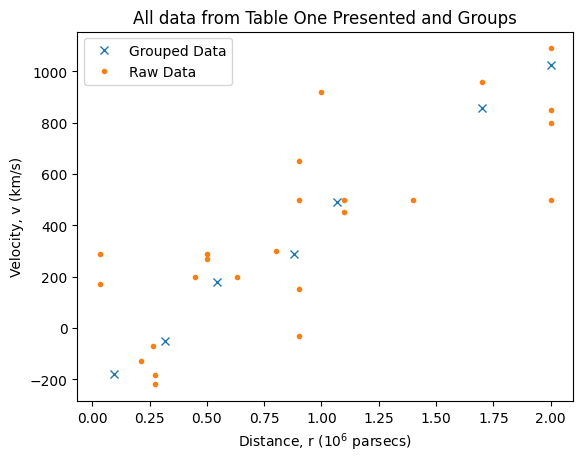

In [3]:
#Plot data (both grouped and raw)

plt.plot(r_average_values,v_average_values, 'x', label = 'Grouped Data')
plt.plot(r,v,'.', label = 'Raw Data')

plt.xlabel(r'Distance, r ($10^6$ parsecs)')
plt.ylabel(r'Velocity, v (km/s)')
plt.legend()
plt.title('All data from Table One Presented and Groups')

In [4]:
''' I put this in a docstring so it won't run because, at least for now, it's useless.

#Extract and plot data from table 2 (not particularly useful)

dtype = [('object', 'U20'),  # String column
         ('v', 'i4'),      # Integer (signed) for velocity
         ('vs', 'i4'),        # Integer (signed) for velocity
         ('r', 'f8'),        # Floating point number
         ('mt', 'f8'),      # Floating point number
         ('Mt', 'f8')]      # Floating point number

object, v, vs, r, mt, Mt = np.loadtxt(
    'raw_data_table2.md',
    dtype=dtype,
    skiprows=1,
    unpack=True)

plt.plot(r,v,'.')

plt.xlabel(r'Distance, r ($10^6$ parsecs)')
plt.ylabel(r'Velocity, v (km/s)')
plt.title('All data from Table 2 Presented')

'''


" I put this in a docstring so it won't run because, at least for now, it's useless.\n\n#Extract and plot data from table 2 (not particularly useful)\n\ndtype = [('object', 'U20'),  # String column\n         ('v', 'i4'),      # Integer (signed) for velocity\n         ('vs', 'i4'),        # Integer (signed) for velocity\n         ('r', 'f8'),        # Floating point number\n         ('mt', 'f8'),      # Floating point number\n         ('Mt', 'f8')]      # Floating point number\n\nobject, v, vs, r, mt, Mt = np.loadtxt(\n    'raw_data_table2.md',\n    dtype=dtype,\n    skiprows=1,\n    unpack=True)\n\nplt.plot(r,v,'.')\n\nplt.xlabel(r'Distance, r ($10^6$ parsecs)')\nplt.ylabel(r'Velocity, v (km/s)')\nplt.title('All data from Table 2 Presented')\n\n"

Fitted parameters for Individual Data: a = 454.158445402444 ± 75.23710901169672, b = -40.783655163336874 ± 83.43887310686323
Fitted parameters for Grouped Data: a = 552.4965714074863 ± 200.06301459364707, b = -66.26377624608011 ± 167.75318329310073


Text(0.5, 1.0, 'All data from Table One Presented Individually and in Groups')

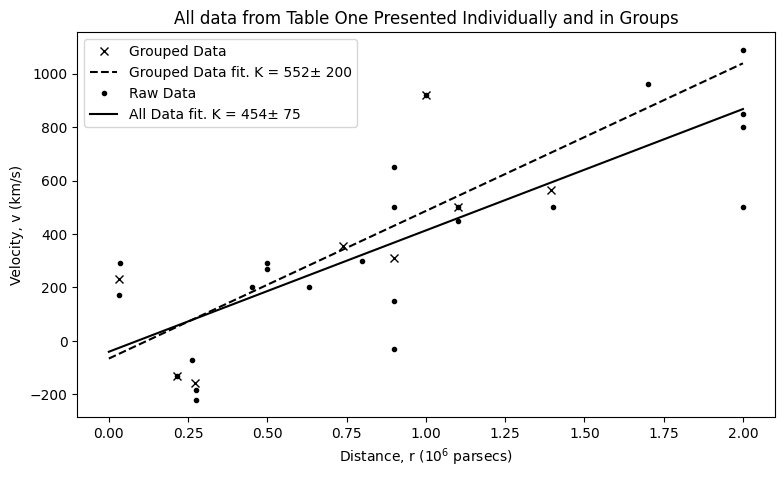

In [5]:
#Set the datatype so np.loadtxt can unpack each column
dtype = [('object', 'U20'),  #String column
         ('m_s', 'U4'),      #String column ('..' indicates non-numeric)
         ('r', 'f8'),        #Floating point number
         ('v', 'i4'),        #Integer (signed) for velocity
         ('m_t', 'f8'),      #Floating point number
         ('M_t', 'f8')]      #Floating point number

#Extract the data
object, ms, r, v, mt, Mt = np.loadtxt(
    'raw_data_table1_grouped.md',
    dtype=dtype,
    skiprows=1,
    unpack=True)

r_grouped = [[r[0], r[1]], [r[2], r[3], r[4]], [r[5]], [r[6], r[7]], [r[8], r[9], r[10], r[11], r[12], r[13], r[14], r[15], r[16], r[17]], [r[18], r[19], r[20], r[21]], [r[22]], [r[23]]]

v_grouped = [[v[0], v[1]], [v[2], v[3], v[4]], [v[5]], [v[6], v[7]], [v[8], v[9], v[10], v[11], v[12], v[13], v[14], v[15], v[16], v[17]], [v[18], v[19], v[20], v[21]], [v[22]], [v[23]]]


rg = [np.average(rgi) for rgi in r_grouped]
vg = [np.average(vgi) for vgi in v_grouped]

##Fit the data

#Define the fitting function
def linear_fit(x,a,b):
    return a*x+b

## Use scipy.optimize to fit the data
popt_all, pcov_all = opt.curve_fit(linear_fit, r, v)
popt_group, pcov_group = opt.curve_fit(linear_fit, rg, vg)

## Extract uncertainties
perr_all = np.sqrt(np.diag(pcov_all))
perr_group = np.sqrt(np.diag(pcov_group))

## Print Fitting parameters
print(f"Fitted parameters for Individual Data: a = {popt_all[0]} ± {perr_all[0]}, b = {popt_all[1]} ± {perr_all[1]}")
print(f"Fitted parameters for Grouped Data: a = {popt_group[0]} ± {perr_group[0]}, b = {popt_group[1]} ± {perr_group[1]}")



plt.figure(figsize=(9,5))
plt.plot(rg,vg, 'x', label = 'Grouped Data', color = 'black')
plt.plot(np.linspace(0,2,1000), linear_fit(np.linspace(0,2,1000), *popt_group), label = f'Grouped Data fit. K = {round(popt_group[0])}± {round(perr_group[0])}', linestyle = '--', color = 'black' )

plt.plot(r,v,'.', label = 'Raw Data', color = 'black')
plt.plot(np.linspace(0,2,1000), linear_fit(np.linspace(0,2,1000), *popt_all), label = f'All Data fit. K = {round(popt_all[0])}± {round(perr_all[0])}', color = 'black' )

plt.xlabel(r'Distance, r ($10^6$ parsecs)')
plt.ylabel(r'Velocity, v (km/s)')
plt.legend()
plt.title('All data from Table One Presented Individually and in Groups')
            